![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- 	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
-
	Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que
- alizar
	Detección de
- malías.
	Debes completar el código pedido en este notebook y contestar las pregunt
- finales.
	Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de De
- Learning.
	Para cada artí
- O indicar:
o	Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección
-  anomalías.
o	Técnicas de detección de anoma
- s empleadas.
o	Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

# Coloca en este espacio el nombre de los integrantes del grupo
## Angel Adalberto Altamirano
## Miguel Ángel Osorio S.
## Juan Sebastián Galindo Lizcano

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('muinar07_act3_CurrentVoltage.csv', sep=',')

En las siguientes lineas de codigo, empezamos a buscar si existe el simbolo de interrogante o question mark (?) en el dataset

In [2]:
# Buscar si alguna celda contiene exactamente el carácter '?'
mask = (df == '?')
print(mask.sum())

DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


In [3]:
total_question_marks = (df == '?').sum().sum()
print(f"Total de '?' en el dataset: {total_question_marks}")

Total de '?' en el dataset: 0


In [4]:
# Buscar valores que contengan '?' en forma de string
total_question_marks = df.apply(lambda x: x.astype(str).str.contains('\?')).sum().sum()
print(f"Total aproximado de '?' encontrados: {total_question_marks}")


Total aproximado de '?' encontrados: 0


Se puede observar que no existen questions marks (?) en las instancias del dataset

In [5]:
#Visualizamos al menos las 10 primeras instancias
df.head(10)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06-27T10:53,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-06-27T10:54,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-06-27T10:56,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-06-27T10:57,241.4,241.4,241.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-06-27T11:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Visualizamos si todos los atributos excepto DeviceTimeStamp son tipo float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceTimeStamp  19352 non-null  object 
 1   VL1              19352 non-null  float64
 2   VL2              19352 non-null  float64
 3   VL3              19352 non-null  float64
 4   IL1              19352 non-null  float64
 5   IL2              19352 non-null  float64
 6   IL3              19352 non-null  float64
 7   VL12             19352 non-null  float64
 8   VL23             19352 non-null  float64
 9   VL31             19352 non-null  float64
 10  INUT             19352 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [7]:
# Ver cuántos NaN hay en cada columna
print(df.isnull().sum())

DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


In [8]:
# Existe al menos algun NaN?
print(df.isnull().values.any())

False


#### ¿Cuántas instancias tiene el dataset?

In [9]:
# Pon aquí tu código
# Número de instancias (filas) y atributos (columnas)
print(df.shape)

(19352, 11)


El dataset contiene:
- 19352 instancias
- 11 atributos

#### ¿Cuál es el tipo de datos predominante en las variables?

In [10]:
#Inserta acá el código
print(df.dtypes)

DeviceTimeStamp     object
VL1                float64
VL2                float64
VL3                float64
IL1                float64
IL2                float64
IL3                float64
VL12               float64
VL23               float64
VL31               float64
INUT               float64
dtype: object


**float64** es el tipo de dato predominante

De esto tambien se pudo observar anteriormente con df.info()

## Variables nulas

**Comentario:** Anteriomente en el pequeño analisis que se hizo, se puede observar que no hay valores nulos y ni valores NaN

#### ¿Tiene este dataset datos faltantes?

In [11]:
# Comprobar la cantidad de datos faltantes por columna
print(df.isnull().sum())


DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


In [12]:
# Ver si existe algún NaN en todo el DataFrame
print("¿Hay datos faltantes en el dataset?:", df.isnull().values.any())

¿Hay datos faltantes en el dataset?: False


#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Realizar conversión de DeviceTimeStamp de object -> Datetime para asegurarnos que los datos esten ordenados por fecha

Porque para la tecnica de Media Móvil siempre depende directamente del orden cronologico para calcular las medias de vetanas temporales.

In [13]:
# Convertir la columna DeviceTimeStamp a datetime
df['DeviceTimeStamp'] = pd.to_datetime(df['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

# Verificamos el cambio
print(df['DeviceTimeStamp'].dtypes)

df.head()

datetime64[ns]


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Ordenar por esa columna
df = df.sort_values(by='DeviceTimeStamp')

# Reiniciar los índices después de ordenar
df = df.reset_index(drop=True)

df.head(20)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06-27 10:53:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-06-27 10:54:00,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-06-27 10:56:00,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-06-27 10:57:00,241.4,241.4,241.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-06-27 11:00:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Realizaremos la busqueda de datos duplicados

In [15]:
# Ver cuántos duplicados existen
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 32


Eliminaremos los duplicados

In [16]:
# Eliminar duplicados
df = df.drop_duplicates()

# Verificamos que ya no existan duplicados
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")


Número de filas después de eliminar duplicados: 19320


Como parte del preprocesamiento, se realiza la detección y eliminación de filas duplicadas para evitar distorsiones en el análisis de anomalías. La presencia de duplicados puede sesgar el cálculo de densidades, medias o distancias, afectando especialmente algoritmos como Isolation Forest y Local Outlier Factor.

Aplicamos la normalización mediante StandardScaler únicamente sobre las variables de tipo float64, ya que estas corresponden a mediciones continuas que pueden tener diferentes escalas y rangos. Las técnicas de detección de anomalías como Z-Score, Isolation Forest y LOF son sensibles a la escala de las variables, por lo que es esencial homogeneizarlas previamente.

In [17]:
# Seleccionar solo columnas float64
df_float = df.select_dtypes(include=['float64'])

# Crear el objeto scaler
scaler = StandardScaler()

# Ajustar y transformar solo las columnas float64
df_float_scaled = pd.DataFrame(scaler.fit_transform(df_float),
                                columns=df_float.columns,
                                index=df_float.index)

# Concatenar columnas no numéricas con las escaladas
df_preprocesado = pd.concat([df[['DeviceTimeStamp']], df_float_scaled], axis=1)

In [18]:
df_preprocesado.head(10)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,-25.259980,-24.521043,-27.100134,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
1,2019-06-27 10:49:00,-0.248247,-0.185098,-0.125537,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
2,2019-06-27 10:51:00,-0.279682,-0.205488,-0.159425,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
3,2019-06-27 10:52:00,-0.122507,-0.052560,0.010014,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
5,2019-06-27 10:53:00,0.003232,0.069782,0.145564,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
6,2019-06-27 10:54:00,-0.038681,0.029001,0.100381,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
7,2019-06-27 10:56:00,-0.038681,0.029001,0.100381,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
8,2019-06-27 10:57:00,0.034667,0.090173,0.168156,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
9,2019-06-27 11:00:00,0.003232,0.069782,0.145564,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239
10,2019-06-27 11:01:00,0.024189,0.090173,0.168156,-1.792906,-1.46118,-1.915872,-3.192535,-3.199222,-3.193739,-1.748239


In [19]:
df.head(10)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06-27 10:53:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-06-27 10:54:00,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-06-27 10:56:00,240.7,240.8,240.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-06-27 10:57:00,241.4,241.4,241.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-06-27 11:00:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2019-06-27 11:01:00,241.3,241.4,241.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora tenemos 2 dataframes:
- El original (df) para aplicar la tecnica de media movil, ya que no depende del escalado de los datos
- El df preprocesado (df_preprocesado) para aplicar Z-score, Isolation Forest o LOF.

Para la técnica de Media Móvil no es necesario estandarizar los datos previamente, ya que este método simplemente calcula promedios locales dentro de una ventana temporal sin depender de la escala de las variables.

#### EDA

Aunque no se solicita formalmente, aplicamos un poco de analisis descriptivo de los datos

In [20]:
df.describe()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
count,19320,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000
mean,2019-11-06 15:41:14.388198656,241.069151,240.515538,239.911351,73.832935,59.068256,83.364394,380.103830,379.153219,380.598659,26.358773
min,2019-06-25 13:06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-22 06:56:15,235.400000,235.100000,235.100000,46.900000,31.600000,56.400000,400.800000,401.400000,402.000000,16.900000
50%,2019-10-27 17:52:30,242.700000,242.100000,241.100000,69.600000,50.200000,80.300000,417.800000,416.300000,418.000000,25.600000
75%,2020-01-29 18:18:45,247.500000,246.700000,245.300000,100.100000,82.600000,114.025000,427.500000,425.300000,427.600000,35.800000
max,2020-04-14 00:30:00,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.500000,444.800000,447.300000,145.800000
std,NaN,9.543768,9.808790,8.853003,41.181669,40.426082,43.513627,119.063255,118.517265,119.173345,15.077719


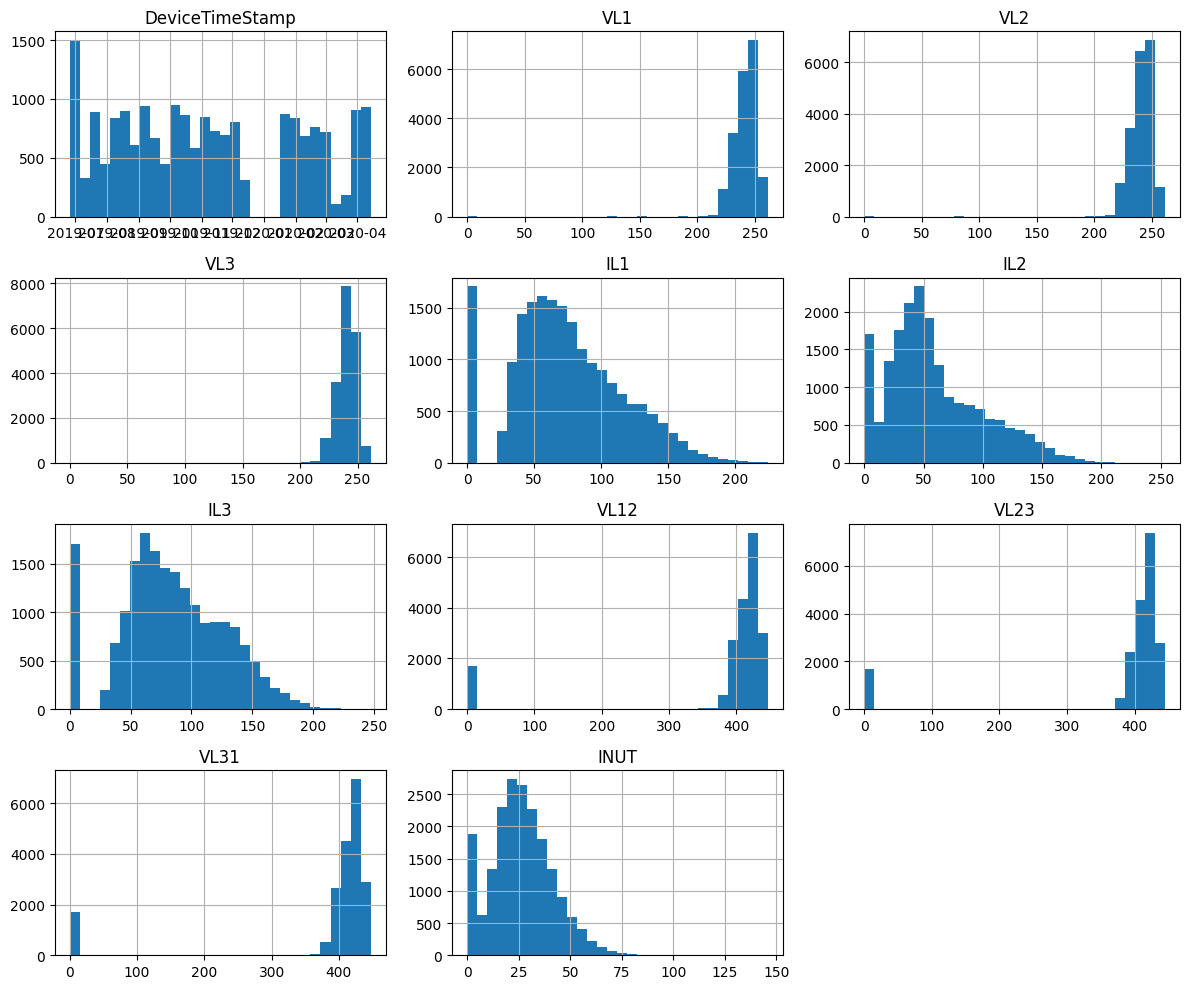

In [21]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

A partir del análisis exploratorio realizado mediante histogramas, se observa que las variables de voltaje (VL1, VL2, VL3, VL12, VL23, VL31) presentan distribuciones con valores mayoritariamente elevados, aunque con algunos registros cercanos a cero que pueden corresponder a eventos anómalos o fallos de medición. Las variables de corriente (IL1, IL2, IL3, INUT) muestran distribuciones sesgadas hacia la izquierda, con valores atípicos en ambos extremos.

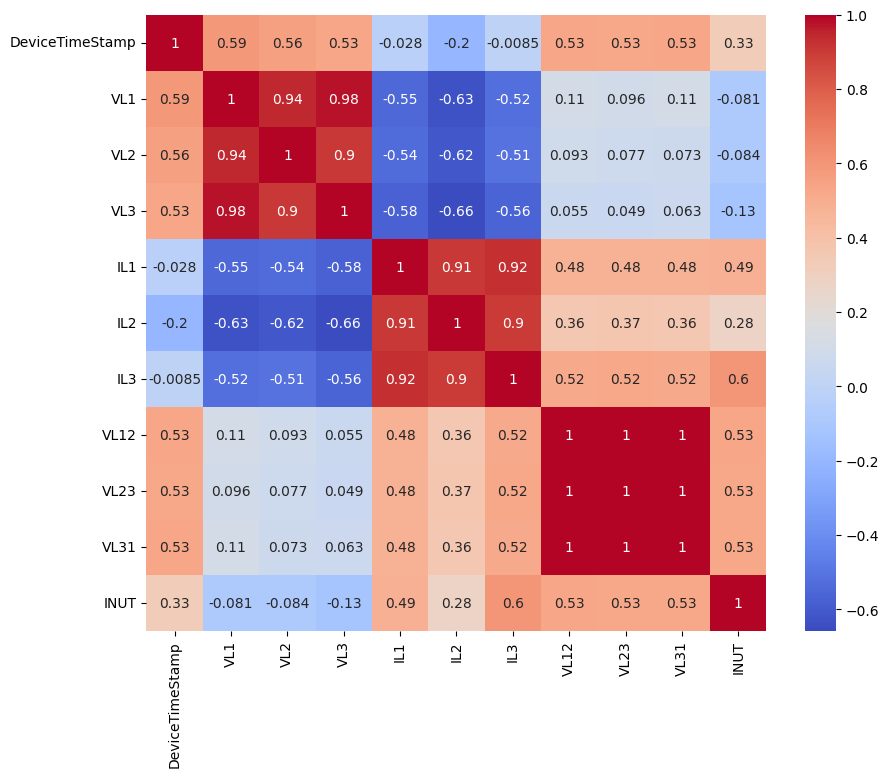

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


1. Las tensiones (VL1, VL2, VL3) están altamente correlacionadas entre sí
2. Las corrientes (IL1, IL2, IL3) también están altamente correlacionadas entre sí
3. Correlaciones cruzadas Tensiones y Corrientes, son negativas como VL1 IL1 = -0.55, Esto sugiere que cuando el voltaje baja ligeramente, la corriente puede aumentar un poco
3. VL12, VL23, VL31 (tensiones entre líneas) están perfectamente correlacionadas

Este análisis confirma que el dataset presenta estructuras internas esperables y permite validar la aplicación posterior de algoritmos de detección de anomalías.

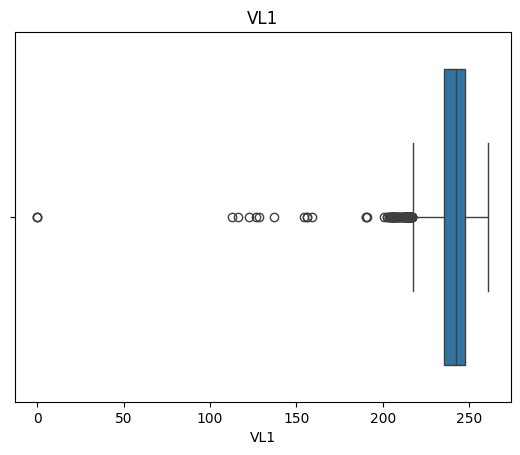

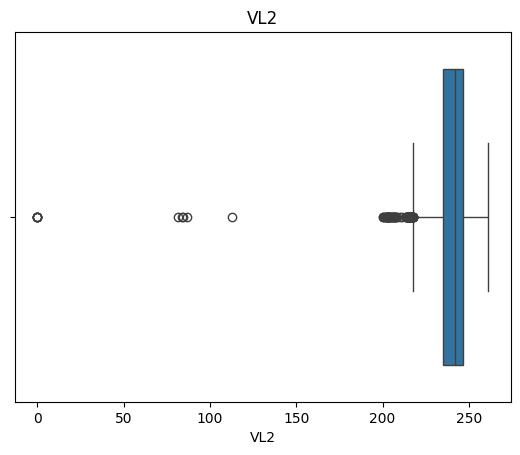

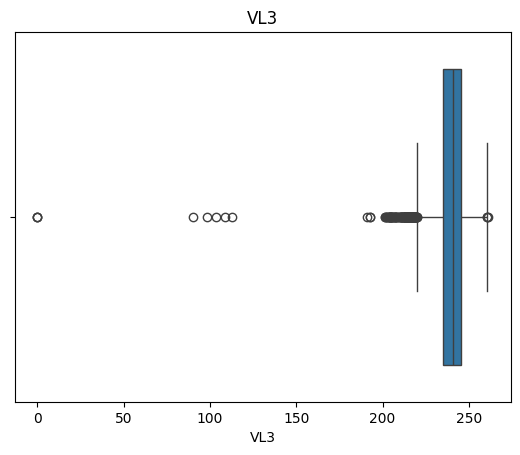

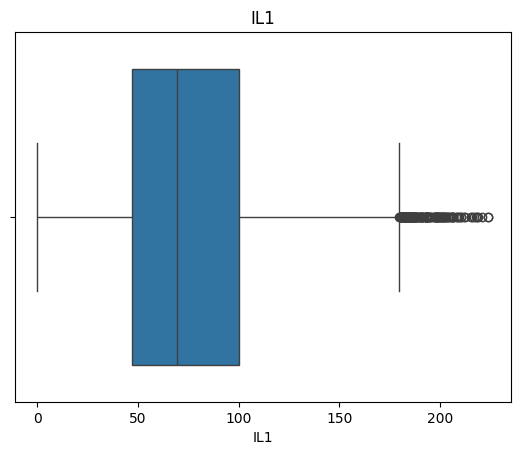

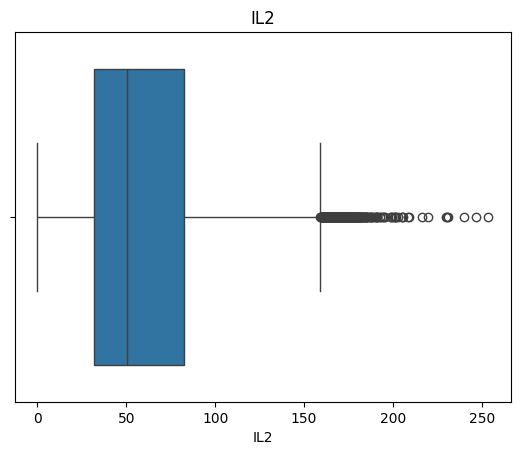

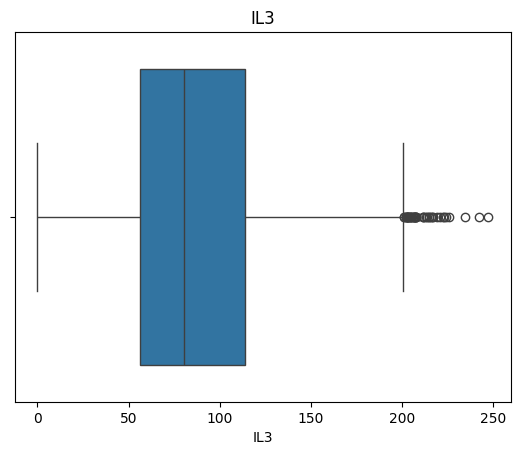

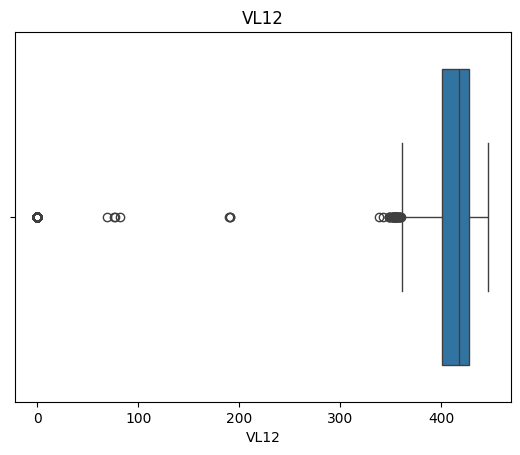

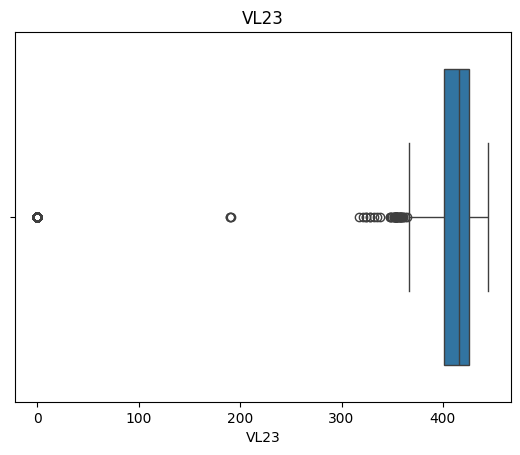

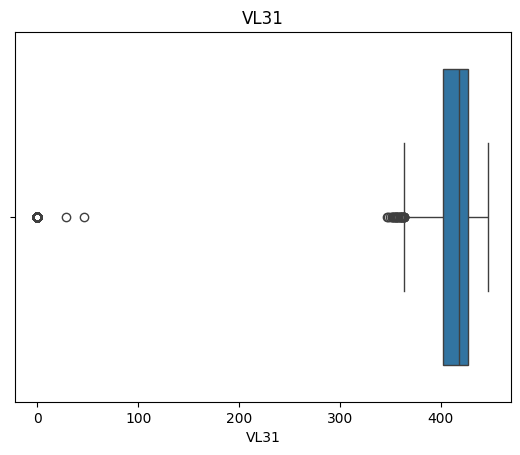

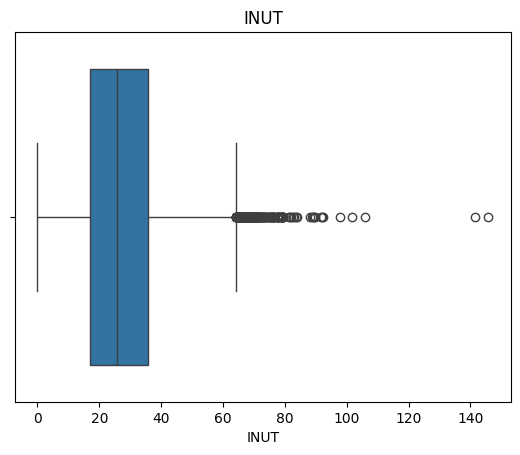

In [23]:
for col in df.select_dtypes(include=['float64']).columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


1. Variables de tensión de fase (VL1, VL2, VL3):
- Presentan valores muy concentrados alrededor de 230-250
-  aparecen múltiples valores extremos (outliers) cercanos a cero o incluso bastante por debajo del rango normal.

2. Variables de corriente de fase (IL1, IL2, IL3):
- Las corrientes muestran distribuciones más dispersas, pero igualmente presentan valores altos por encima de 200.

3. Variables de tensión entre líneas (VL12, VL23, VL31):
- Los datos están altamente concentrados cerca de 400.

4. Corriente neutra (INUT):
- La mayoria tiende a estar en valores bajos.
- Existen valores por encima de 100

In [24]:
print(df.columns)


Index(['DeviceTimeStamp', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12',
       'VL23', 'VL31', 'INUT'],
      dtype='object')


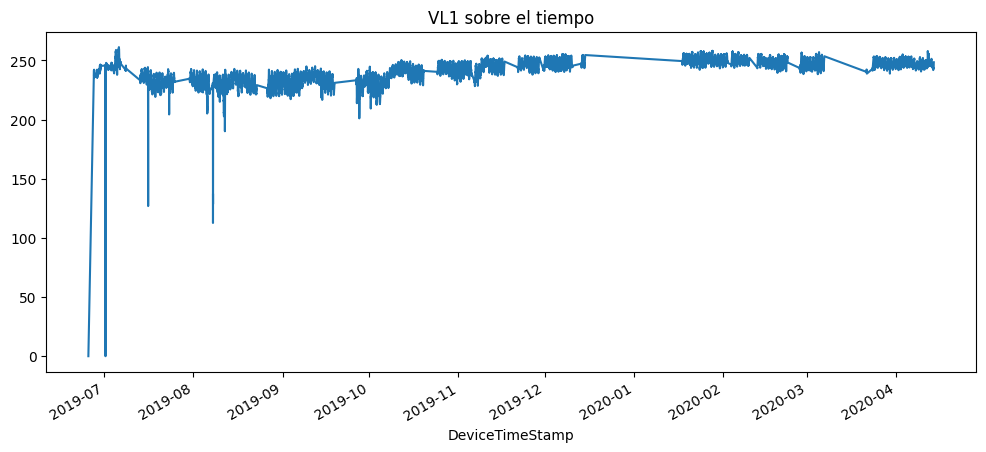

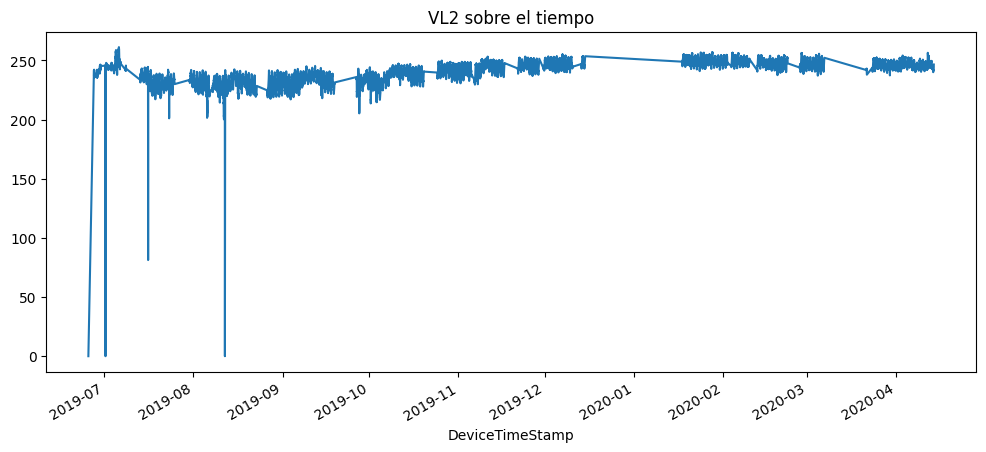

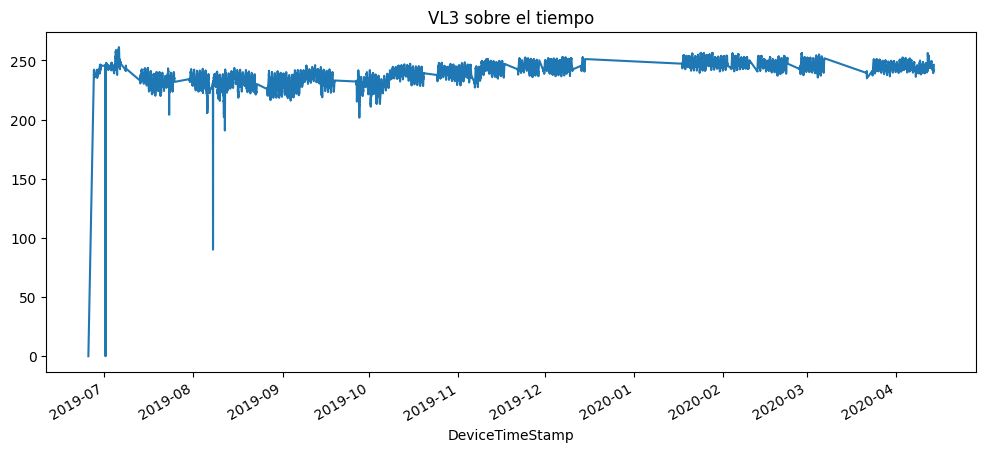

In [25]:
for col in ['VL1', 'VL2', 'VL3']:
    df.set_index('DeviceTimeStamp')[col].plot(figsize=(12, 5))
    plt.title(f"{col} sobre el tiempo")
    plt.show()


Al analizar las series temporales de las tensiones de fase (VL1, VL2, VL3), se observa un comportamiento estable alrededor de 240-250V durante la mayor parte del período. Sin embargo, se identifican múltiples caídas abruptas de voltaje que alcanzan valores cercanos a cero, representando eventos anómalos posiblemente asociados a fallos de fase, interrupciones de suministro o desconexiones del sistema eléctrico.

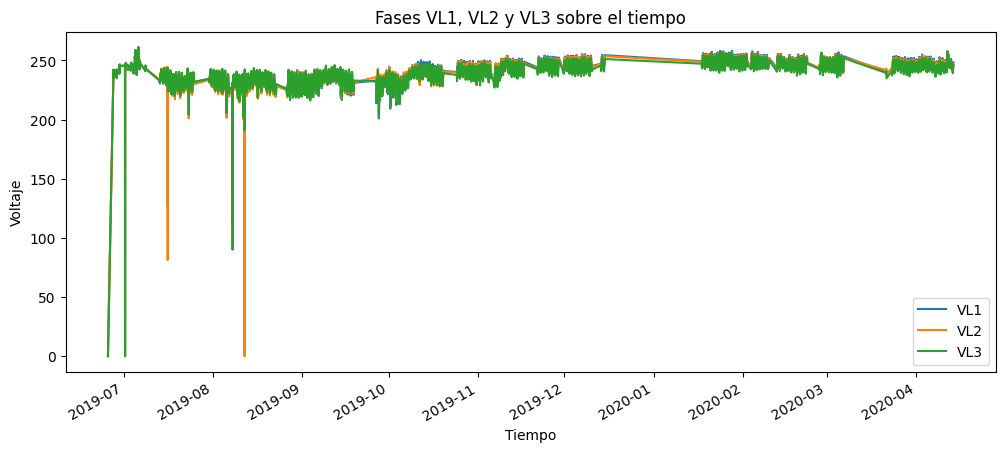

In [26]:
df.set_index('DeviceTimeStamp')[['VL1', 'VL2', 'VL3']].plot(figsize=(12, 5))
plt.title("Fases VL1, VL2 y VL3 sobre el tiempo")
plt.ylabel("Voltaje")
plt.xlabel("Tiempo")
plt.legend(["VL1", "VL2", "VL3"])
plt.show()


El análisis conjunto de las tensiones trifásicas (VL1, VL2, VL3) confirma un comportamiento altamente sincronizado y estable bajo condiciones normales de operación.

Las anomalías detectadas, caracterizadas por caídas simultáneas de voltaje, sugieren eventos de interrupción de suministro eléctrico o fallos globales del sistema.

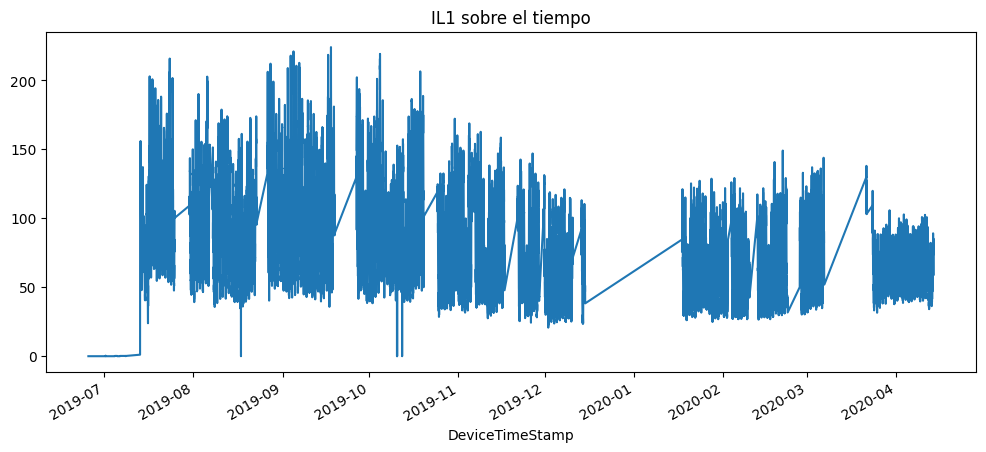

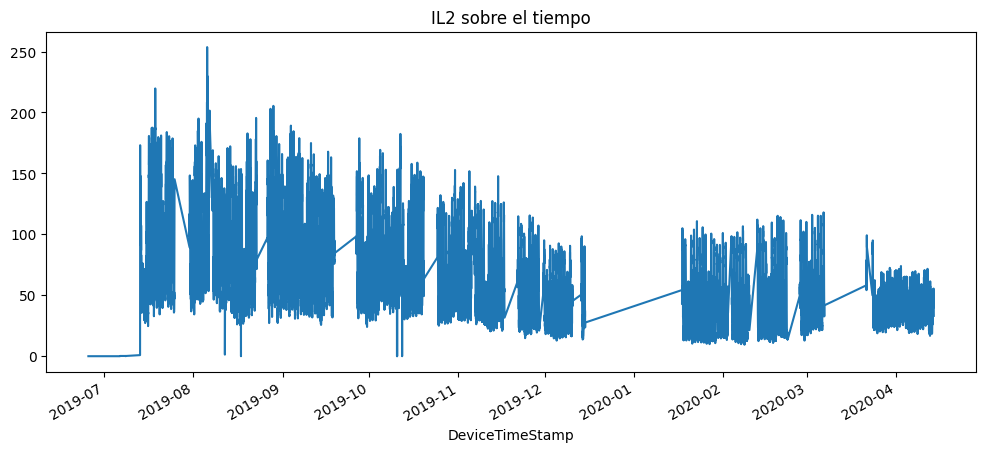

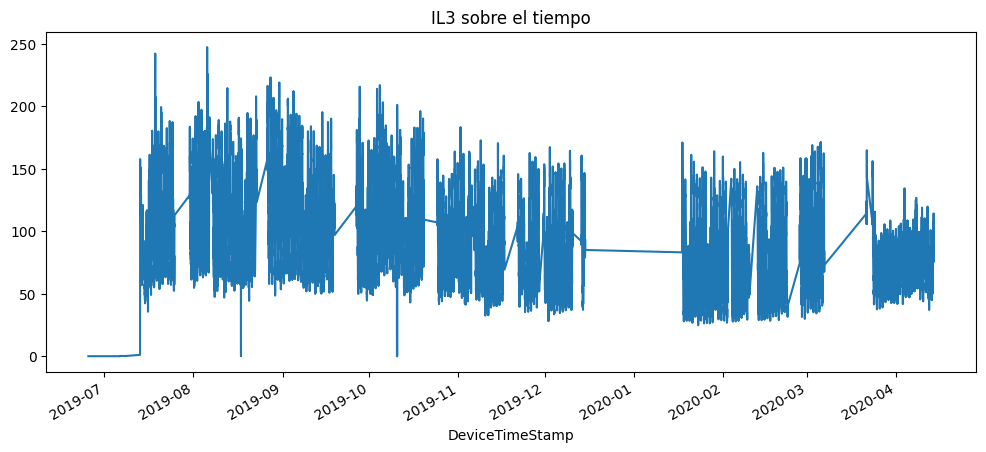

In [27]:
for col in ['IL1', 'IL2', 'IL3']:
    df.set_index('DeviceTimeStamp')[col].plot(figsize=(12, 5))
    plt.title(f"{col} sobre el tiempo")
    plt.show()


- El análisis temporal de las corrientes de línea IL1, IL2 e IL3 muestra un comportamiento coherente
- Las fluctuaciones observadas reflejan los ciclos de operación de los equipos conectados, mientras que los picos de corriente y los valores cercanos a cero constituyen posibles anomalías a investigar.


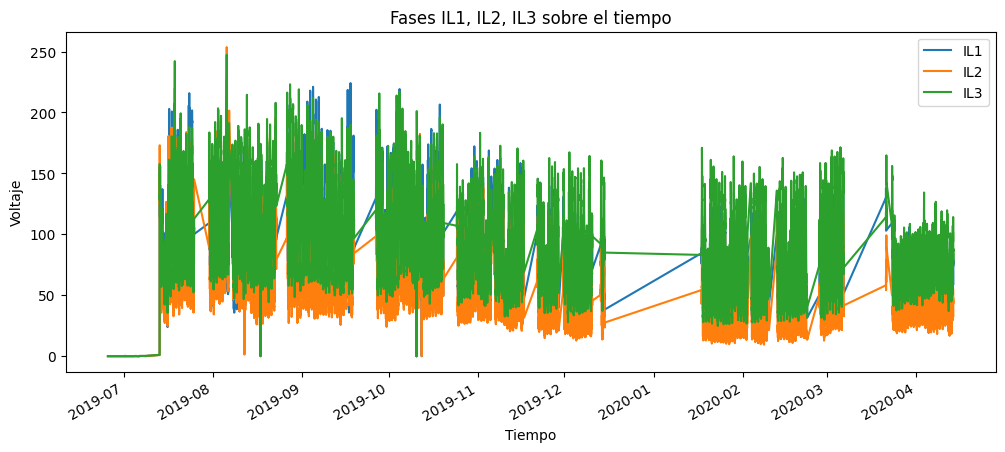

In [28]:
df.set_index('DeviceTimeStamp')[['IL1', 'IL2', 'IL3']].plot(figsize=(12, 5))
plt.title("Fases IL1, IL2, IL3 sobre el tiempo")
plt.ylabel("Voltaje")
plt.xlabel("Tiempo")
plt.legend(['IL1', 'IL2', 'IL3'])
plt.show()


Se identifican picos de corriente superiores a 200 A y caídas cercanas a cero, que representan eventos potencialmente anómalos. Además, se observan períodos sin registros, coincidentes con los identificados en las tensiones, los cuales podrían estar asociados a mantenimientos o paradas de planta. Confirmando la existencia de outliers.

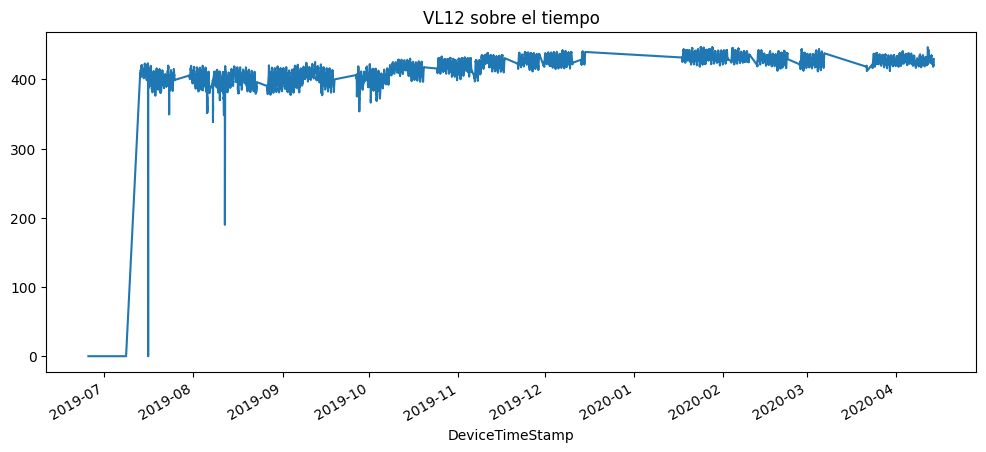

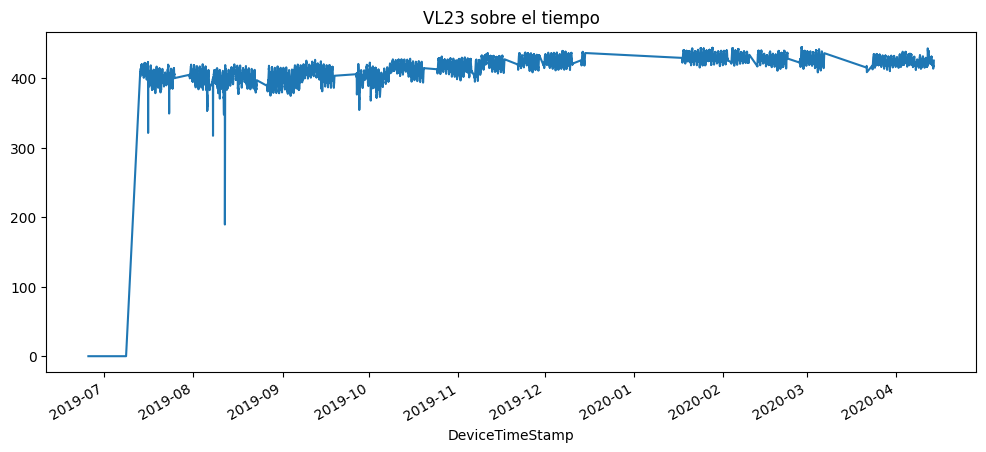

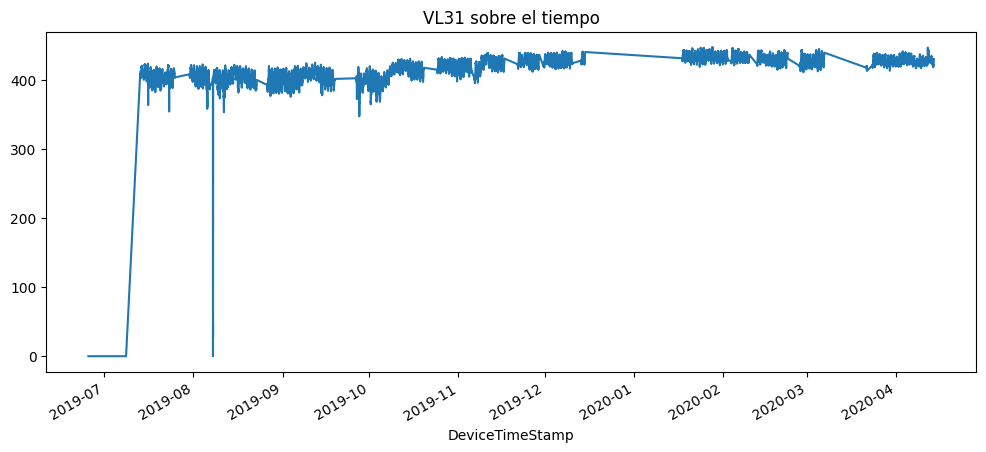

In [29]:
for col in ['VL12', 'VL23', 'VL31']:
    df.set_index('DeviceTimeStamp')[col].plot(figsize=(12, 5))
    plt.title(f"{col} sobre el tiempo")
    plt.show()


El análisis temporal de las tensiones entre líneas (VL12, VL23 y VL31) confirma la estabilidad global del sistema, con valores cercanos a los 400V durante los periodos de operación normal. Las caídas simultáneas de tensión identificadas, que en algunos casos descienden a valores cercanos a cero, indican posibles fallos generales

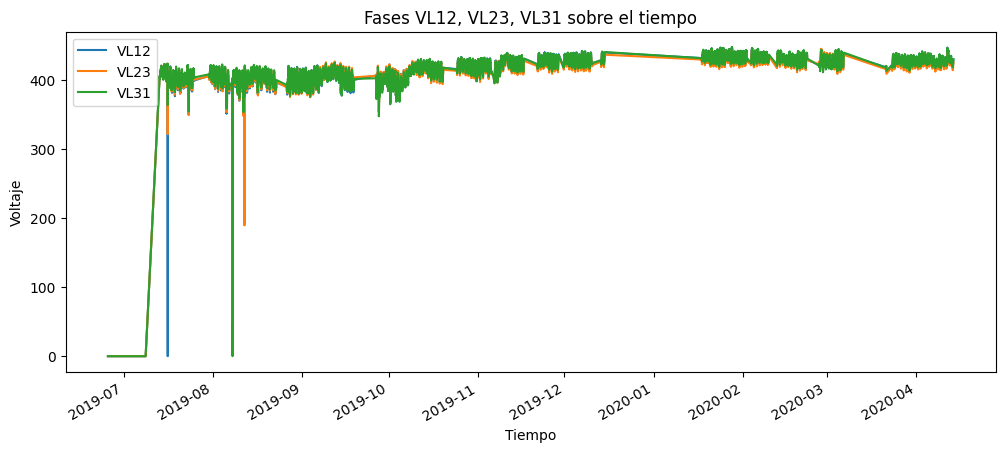

In [30]:
df.set_index('DeviceTimeStamp')[['VL12', 'VL23', 'VL31']].plot(figsize=(12, 5))
plt.title("Fases VL12, VL23, VL31 sobre el tiempo")
plt.ylabel("Voltaje")
plt.xlabel("Tiempo")
plt.legend(['VL12', 'VL23', 'VL31'])
plt.show()


El análisis combinado de las tensiones de línea (VL12, VL23, VL31) muestra un comportamiento altamente sincronizado

Las caídas abruptas simultáneas y los huecos temporales detectados refuerzan la presencia de eventos anómalos que afectan al sistema eléctrico

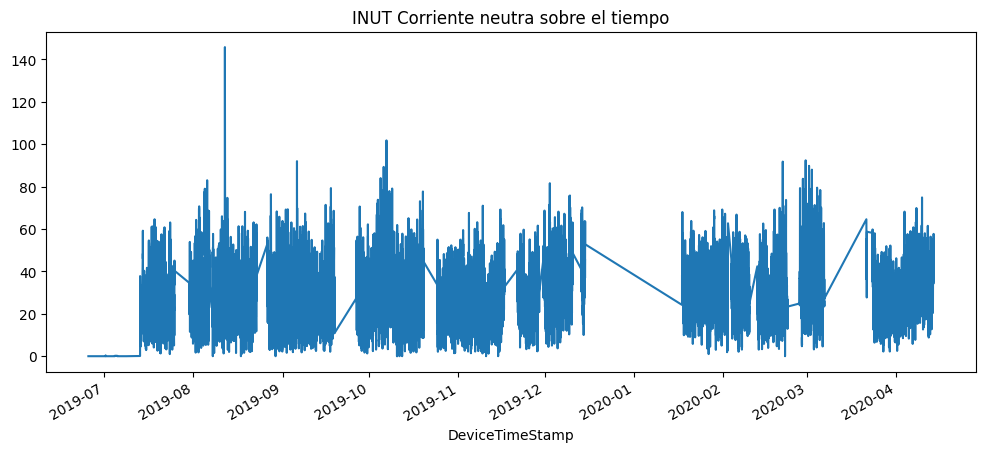

In [31]:
df.set_index('DeviceTimeStamp')['INUT'].plot(figsize=(12, 5))
plt.title(f"INUT Corriente neutra sobre el tiempo")
plt.show()

El análisis de la corriente neutra (INUT) muestra que la mayoria de valores entan en un rango de 10 a 60. Sin embargo, existen picos anómalos que supera los valores de 100.

El análisis gráfico y estadístico previo permitió comprender el comportamiento normal del sistema, e identificar rangos operativos; como tambien ayuda a detectar multiples eventos anómalos.

#### Media móvil

In [32]:
# Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT
window_size = 50  # Tamaño de la ventana

In [33]:
# Calcula la media móvil
df['INUT_MA'] = df['INUT'].rolling(window=window_size, center=True, min_periods=1).mean()

# Mostramos las primeras filas para verificar
df[['DeviceTimeStamp', 'INUT', 'INUT_MA']].head(3000)

,DeviceTimeStamp,INUT,INUT_MA
0,2019-06-25 13:06:00,0.0,0.000
1,2019-06-27 10:49:00,0.0,0.000
2,2019-06-27 10:51:00,0.0,0.000
3,2019-06-27 10:52:00,0.0,0.000
5,2019-06-27 10:53:00,0.0,0.000
...,...,...,...
3027,2019-08-02 00:30:00,32.6,27.030
3028,2019-08-02 00:45:00,33.7,26.632
3029,2019-08-02 01:00:00,21.1,26.672
3030,2019-08-02 01:15:00,18.8,26.726


In [34]:
# Define un umbral para detectar anomalías
# Calculamos el error absoluto
df['error'] = np.abs(df['INUT'] - df['INUT_MA'])

# Definimos el umbral como 3 veces la desviación estándar del error
# Este 3 es un valor habitual (3 sigmas → 99.7% de confianza bajo una distribución normal).
threshold = 3 * df['error'].std()

print(f"El umbral de detección de anomalías es: {threshold:.2f}")

# Identificamos las anomalías
df['anomaly_moving_avg'] = df['error'] > threshold

# Mostramos el total de anomalías detectadas
print(f"Total de anomalías detectadas: {df['anomaly_moving_avg'].sum()}")


El umbral de detección de anomalías es: 20.24
Total de anomalías detectadas: 998


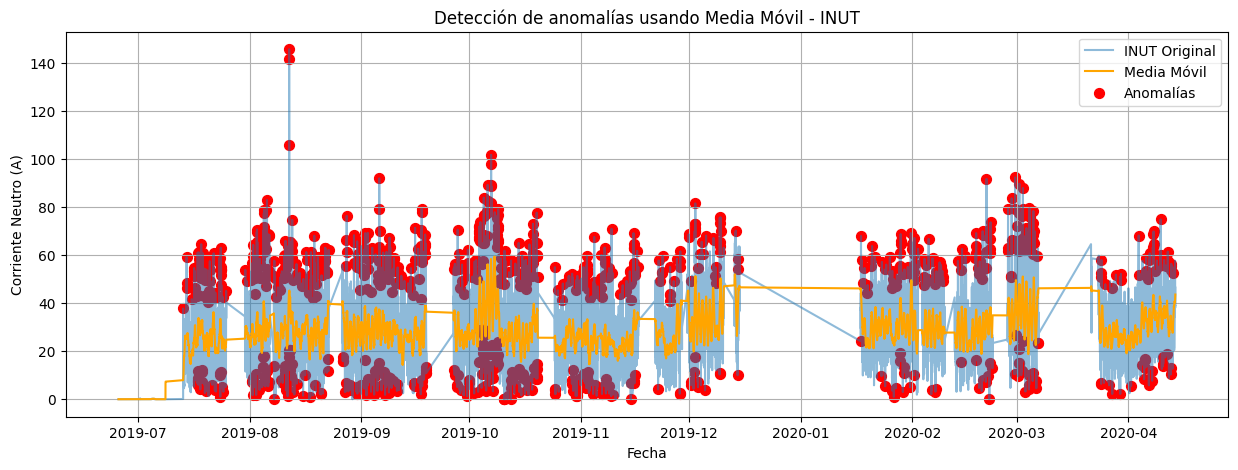

In [35]:
# Visualiza los resultados
plt.figure(figsize=(15, 5))

# Serie original
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Media Móvil
plt.plot(df['DeviceTimeStamp'], df['INUT_MA'], label='Media Móvil', color='orange')

# Anomalías
plt.scatter(df.loc[df['anomaly_moving_avg'], 'DeviceTimeStamp'],
            df.loc[df['anomaly_moving_avg'], 'INUT'],
            color='red', label='Anomalías', s=50)

plt.title('Detección de anomalías usando Media Móvil - INUT')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()


Se visualizan las anomalías detectadas en la corriente de neutro (INUT) mediante el método de media móvil. Los puntos en rojo representan registros que se desvían significativamente de la tendencia local establecida por la media móvil.

#### Z-Score

In [36]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código
# Aplicamos Z-Score directamente (df_preprocesado ya está estandarizado)
df_preprocesado['INUT_Z'] = df_preprocesado['INUT']  # ya estandarizado

In [37]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)

# Definimos el umbral de detección (3 desviaciones estándar)
z_threshold = 3

# Detectamos las anomalías: cuando el Z-Score supera el umbral (en valor absoluto)
df_preprocesado['anomaly_zscore'] = np.abs(df_preprocesado['INUT']) > z_threshold

# Mostrar cuántas anomalías se han detectado
total_anomalies = df_preprocesado['anomaly_zscore'].sum()
print(f"Total de anomalías detectadas mediante Z-Score: {total_anomalies}")

Total de anomalías detectadas mediante Z-Score: 72


In [38]:
# Extraemos las instancias anómalas solo para visualizarlas
anomalies_zscore = df[df_preprocesado['anomaly_zscore']]

# Mostramos las primeras anomalías encontradas
anomalies_zscore.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,INUT_MA,error,anomaly_moving_avg
3309,2019-08-04 21:45:00,228.9,228.8,229.8,125.4,90.8,180.2,396.1,396.5,399.3,77.6,40.248,37.352,True
3315,2019-08-04 23:15:00,231.3,230.9,232.3,137.8,88.7,179.8,400.7,400.8,404.0,79.0,38.142,40.858,True
3318,2019-08-05 00:00:00,233.7,232.7,234.1,99.2,97.6,170.2,402.9,402.8,406.9,71.8,38.188,33.612,True
3359,2019-08-05 10:15:00,230.9,228.4,231.0,71.8,156.0,99.1,393.7,396.2,399.7,78.9,24.952,53.948,True
3393,2019-08-05 18:45:00,215.9,211.2,213.8,168.0,253.6,247.3,365.9,364.6,373.2,83.0,31.134,51.866,True


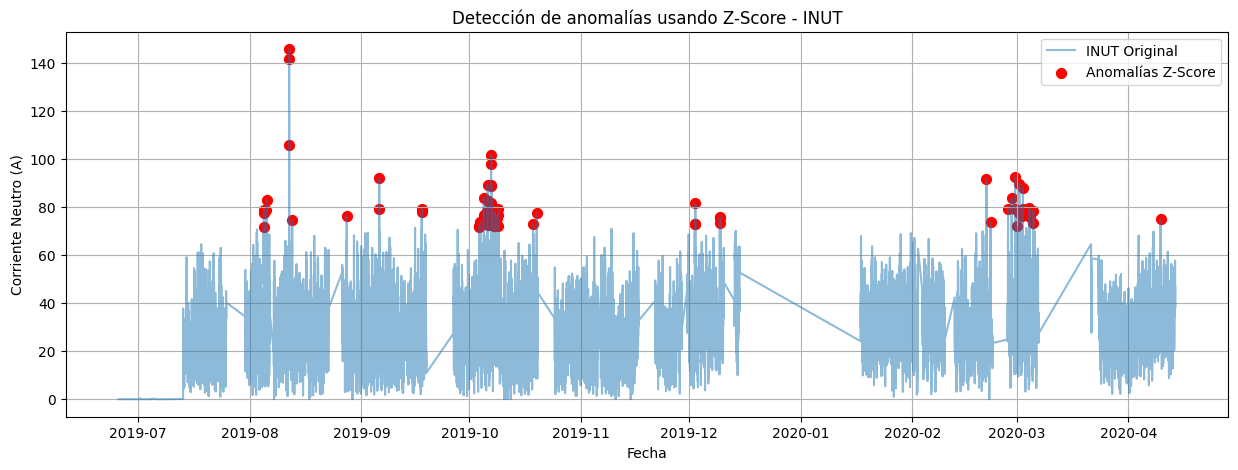

In [39]:
# Visualiza los resultados
plt.figure(figsize=(15, 5))

# Serie original de INUT (ya lo tienes también en df original, pero aquí lo usamos del preprocesado)
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Anomalías detectadas por Z-Score
plt.scatter(df['DeviceTimeStamp'][df_preprocesado['anomaly_zscore']],
            df['INUT'][df_preprocesado['anomaly_zscore']],
            color='red', label='Anomalías Z-Score', s=50)

plt.title('Detección de anomalías usando Z-Score - INUT')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()

El método ha detectado un conjunto limitado de registros anómalos:

- Principalmente centrados en los picos máximos de corriente por encima de 70, llegando hasta el máximo absoluto aproximado de 145.

- Los valores anómalos detectados coinciden con los eventos más extremos del sistema.

- Los puntos en rojo representan los registros que superan el umbral estadístico de 3 desviaciones estándar.

#### Isolation Forest

In [40]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código
# Definimos el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Ajustamos solo sobre la variable INUT (preprocesada y estandarizada)
iso_forest.fit(df_preprocesado[['INUT']])

IsolationForest(contamination=0.05, random_state=42)

In [41]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
# Calculamos el puntaje de anomalía
df_preprocesado['isoforest_score'] = iso_forest.decision_function(df_preprocesado[['INUT']])

# Predicciones: -1 indica anomalía, 1 indica normal
df_preprocesado['anomaly_isolation'] = iso_forest.predict(df_preprocesado[['INUT']]) == -1

# Mostramos las primeras filas
df_preprocesado[['INUT', 'isoforest_score', 'anomaly_isolation']].head()

,INUT,isoforest_score,anomaly_isolation
0,-1.748239,0.089117,False
1,-1.748239,0.089117,False
2,-1.748239,0.089117,False
3,-1.748239,0.089117,False
5,-1.748239,0.089117,False


In [42]:
# Total de anomalías detectadas
total_anomalies_isolation = df_preprocesado['anomaly_isolation'].sum()
print(f"Total de anomalías detectadas por Isolation Forest: {total_anomalies_isolation}")

Total de anomalías detectadas por Isolation Forest: 961


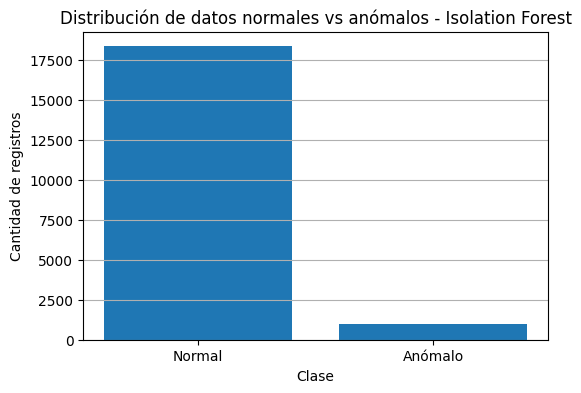

In [43]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
# Contamos la cantidad de normales y anómalos
counts = df_preprocesado['anomaly_isolation'].value_counts()

# Creamos el gráfico
plt.figure(figsize=(6,4))
plt.bar(['Normal', 'Anómalo'], counts.sort_index())
plt.title('Distribución de datos normales vs anómalos - Isolation Forest')
plt.ylabel('Cantidad de registros')
plt.xlabel('Clase')
plt.grid(axis='y')
plt.show()

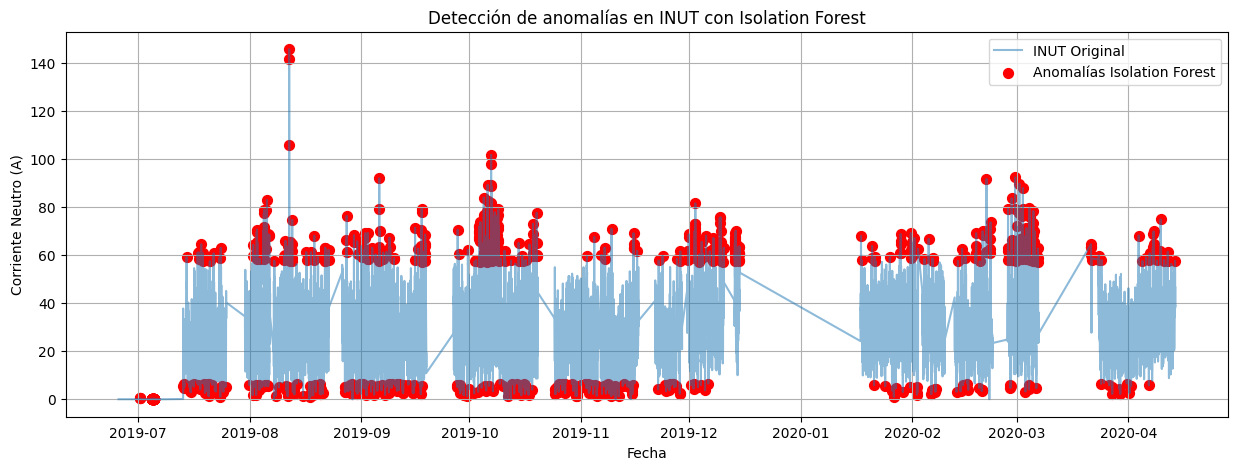

In [44]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(15, 5))

# Serie original de INUT (no estandarizada)
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Anomalías detectadas por Isolation Forest
plt.scatter(df.loc[df_preprocesado['anomaly_isolation'], 'DeviceTimeStamp'],
            df.loc[df_preprocesado['anomaly_isolation'], 'INUT'],
            color='red', label='Anomalías Isolation Forest', s=50)

plt.title('Detección de anomalías en INUT con Isolation Forest')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()

El algoritmo Isolation Forest, configurado con contamination=5%, ha permitido identificar un conjunto amplio de registros anómalos en la corriente de neutro (INUT). Esta configuración más sensible detecta no solo los picos de corriente más extremos, sino también valores intermedios que presentan desviaciones significativas respecto al comportamiento normal. La capacidad del modelo para detectar tanto anomalías severas como leves permite capturar un espectro más completo de eventos anómalos en el sistema eléctrico.

In [45]:
# Repite los pasos anteriores con el parámetro de contamination en 1%
# Definimos el nuevo modelo Isolation Forest con 1% de anomalías
iso_forest_1 = IsolationForest(contamination=0.01, random_state=42)

# Ajustamos sobre la misma variable INUT ya estandarizada
iso_forest_1.fit(df_preprocesado[['INUT']])

# Calculamos los puntajes de anomalía
df_preprocesado['isoforest_score_1'] = iso_forest_1.decision_function(df_preprocesado[['INUT']])

# Detectamos las anomalías (-1 indica anómalo)
df_preprocesado['anomaly_isolation_1'] = iso_forest_1.predict(df_preprocesado[['INUT']]) == -1

# Mostramos el total de anomalías detectadas
total_anomalies_1 = df_preprocesado['anomaly_isolation_1'].sum()
print(f"Total de anomalías detectadas por Isolation Forest (1%): {total_anomalies_1}")


Total de anomalías detectadas por Isolation Forest (1%): 189


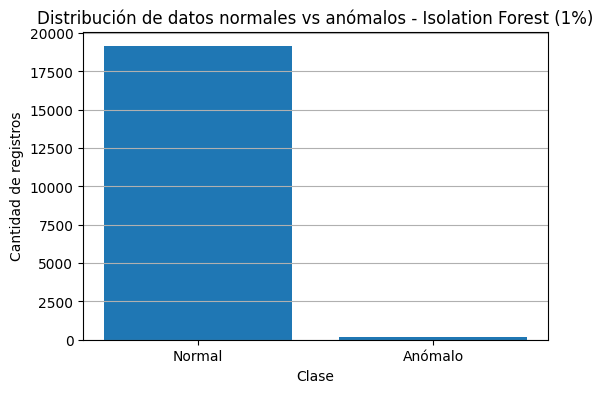

In [46]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
# Contamos la cantidad de normales y anómalos con el nuevo modelo
counts_1 = df_preprocesado['anomaly_isolation_1'].value_counts()

# Creamos el gráfico
plt.figure(figsize=(6,4))
plt.bar(['Normal', 'Anómalo'], counts_1.sort_index())
plt.title('Distribución de datos normales vs anómalos - Isolation Forest (1%)')
plt.ylabel('Cantidad de registros')
plt.xlabel('Clase')
plt.grid(axis='y')
plt.show()


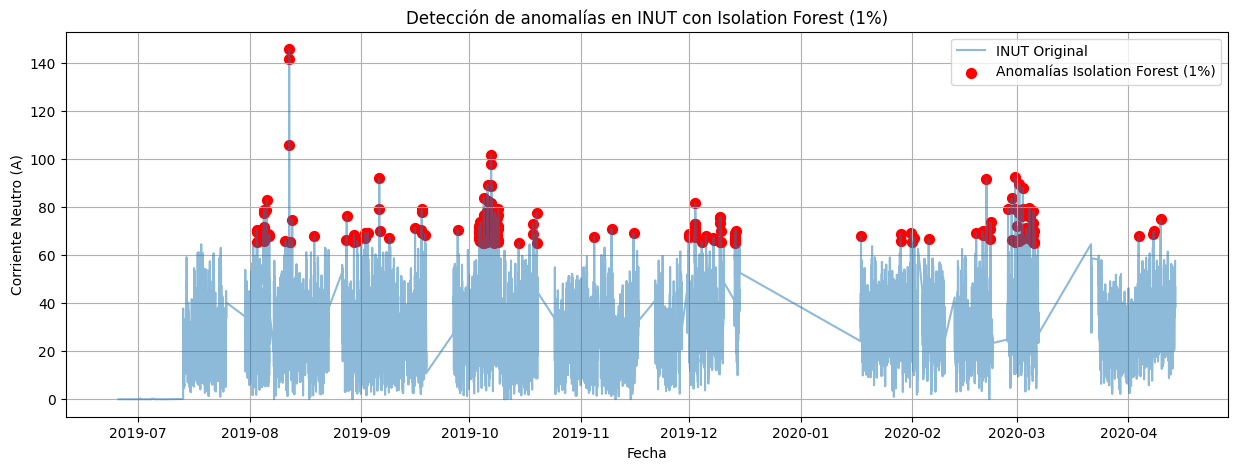

In [47]:
plt.figure(figsize=(15, 5))

# Serie original de INUT (no estandarizada)
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Anomalías detectadas por Isolation Forest (1%)
plt.scatter(
    df.loc[df_preprocesado['anomaly_isolation_1'], 'DeviceTimeStamp'],
    df.loc[df_preprocesado['anomaly_isolation_1'], 'INUT'],
    color='red', label='Anomalías Isolation Forest (1%)', s=50
)

plt.title('Detección de anomalías en INUT con Isolation Forest (1%)')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()


Al aplicar Isolation Forest con un contamination=1%, el modelo se vuelve más estricto, identificando únicamente los registros de corriente de neutro más severamente desviados del comportamiento normal. Las anomalías detectadas corresponden principalmente a picos extremos de corriente, los cuales reflejan desbalances significativos en el sistema eléctrico. Esta configuración es especialmente útil cuando el objetivo es detectar solo los eventos más críticos y evitar falsos positivos en fluctuaciones leves.

| Parámetro                     | Contamination = 5%                                                                                 | Contamination = 1%                                                         |
| ----------------------------- | -------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| Suposición del modelo         | Asume que aproximadamente el **5% de los datos son anómalos**                                      | Asume que sólo el **1% de los datos son anómalos**                         |
| Nivel de sensibilidad         | **Más sensible**: detecta más anomalías, incluso casos "menos graves"                              | **Más estricto**: solo marca como anomalía los casos más extremos          |
| Número de outliers detectados | Mayor cantidad                                                                                     | Menor cantidad                                                             |
| Riesgo de falsos positivos    | Más probable (puede detectar casos límite como anómalos)                                           | Mucho menor (se centra solo en los casos realmente extremos)               |
| Aplicación típica             | Cuando quieres ser muy sensible en sistemas críticos (por ejemplo, no perder ningún posible fallo) | Cuando solo te interesa detectar los casos realmente peligrosos o extremos |


Al comparar los resultados de Isolation Forest con contamination=5% y contamination=1%, se observa que el modelo con 5% presenta mayor sensibilidad, identificando un conjunto más amplio de registros anómalos, incluyendo posibles desbalances moderados en la corriente de neutro. Por su parte, el modelo con 1% actúa de forma más estricta, restringiéndose a los registros más extremos y severos. Esta diferencia permite ajustar el nivel de tolerancia en la detección de anomalías según el criterio de severidad del análisis.

Anomalías Isolation Forest 5%: 961
Anomalías Isolation Forest 1%: 189
Coincidencias: 189
Exclusivas 5%: 772
Exclusivas 1%: 0


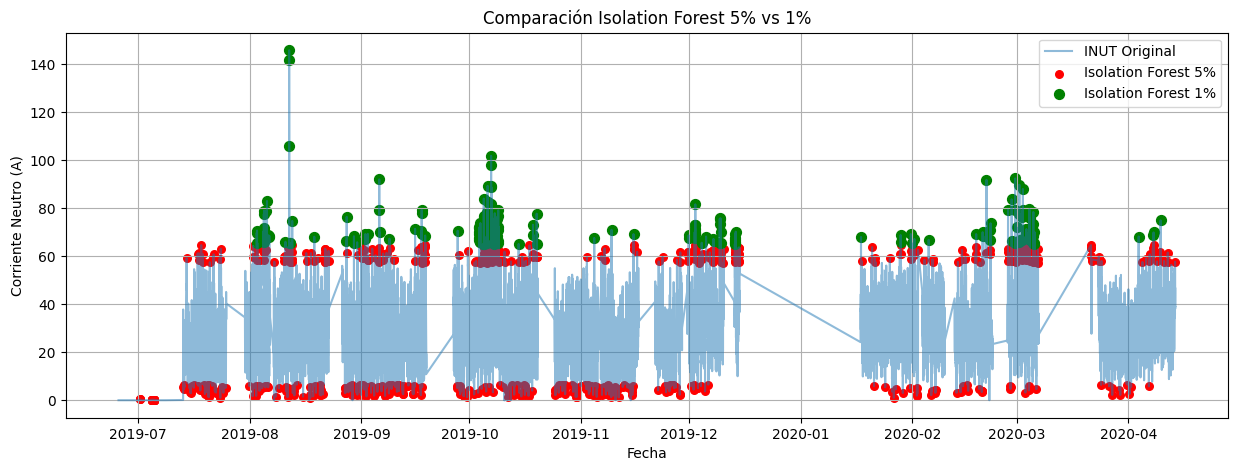

In [48]:
# Conteo simple
total_5 = df_preprocesado['anomaly_isolation'].sum()
total_1 = df_preprocesado['anomaly_isolation_1'].sum()

print(f"Anomalías Isolation Forest 5%: {total_5}")
print(f"Anomalías Isolation Forest 1%: {total_1}")

# Encontrar registros donde ambos modelos coinciden (ambos True)
coincidencias = (df_preprocesado['anomaly_isolation'] & df_preprocesado['anomaly_isolation_1']).sum()

# Encontrar los que solo detecta el modelo 5%
solo_5 = ((df_preprocesado['anomaly_isolation'] == True) & (df_preprocesado['anomaly_isolation_1'] == False)).sum()

# Encontrar los que solo detecta el modelo 1% (normalmente será 0 o muy bajo)
solo_1 = ((df_preprocesado['anomaly_isolation'] == False) & (df_preprocesado['anomaly_isolation_1'] == True)).sum()

print(f"Coincidencias: {coincidencias}")
print(f"Exclusivas 5%: {solo_5}")
print(f"Exclusivas 1%: {solo_1}")

plt.figure(figsize=(15, 5))
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Anomalías 5% en rojo
plt.scatter(df.loc[df_preprocesado['anomaly_isolation'], 'DeviceTimeStamp'],
            df.loc[df_preprocesado['anomaly_isolation'], 'INUT'],
            color='red', label='Isolation Forest 5%', s=30)

# Anomalías 1% en verde
plt.scatter(df.loc[df_preprocesado['anomaly_isolation_1'], 'DeviceTimeStamp'],
            df.loc[df_preprocesado['anomaly_isolation_1'], 'INUT'],
            color='green', label='Isolation Forest 1%', s=50)

plt.title('Comparación Isolation Forest 5% vs 1%')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()


Al comparar gráficamente las detecciones de anomalías entre Isolation Forest con contamination=5% y contamination=1%, se observa que el modelo al 5% es más inclusivo, detectando una gama más amplia de desviaciones, mientras que el modelo al 1% es más estricto, seleccionando únicamente los registros con los valores de corriente de neutro más extremos. Esta diferencia visualiza claramente el impacto del parámetro contamination en la sensibilidad del algoritmo, permitiendo ajustar el análisis según los criterios de riesgo definidos para el sistema eléctrico.

## Local Outlier Factor

In [49]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código
# Definimos el modelo LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Ajustamos el modelo y obtenemos predicciones
df_preprocesado['anomaly_lof'] = lof.fit_predict(df_preprocesado[['INUT']]) == -1

# Obtenemos el puntaje LOF (negativo: más anómalo)
df_preprocesado['lof_score'] = lof.negative_outlier_factor_

# Contamos cuántas anomalías fueron detectadas
total_lof_anomalies = df_preprocesado['anomaly_lof'].sum()
print(f"Total de anomalías detectadas por LOF: {total_lof_anomalies}")

Total de anomalías detectadas por LOF: 949


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


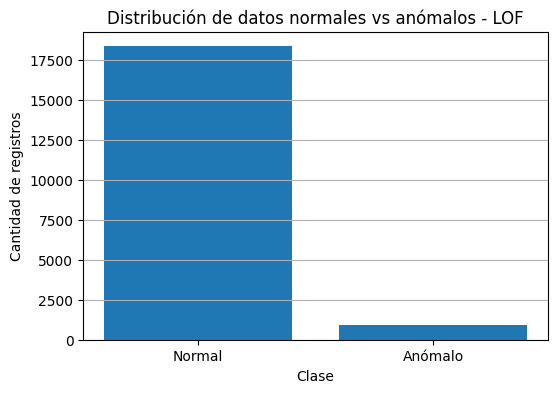

In [50]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
# Contamos la cantidad de normales y anómalos en LOF
counts_lof = df_preprocesado['anomaly_lof'].value_counts()

# Creamos el gráfico
plt.figure(figsize=(6,4))
plt.bar(['Normal', 'Anómalo'], counts_lof.sort_index())
plt.title('Distribución de datos normales vs anómalos - LOF')
plt.ylabel('Cantidad de registros')
plt.xlabel('Clase')
plt.grid(axis='y')
plt.show()

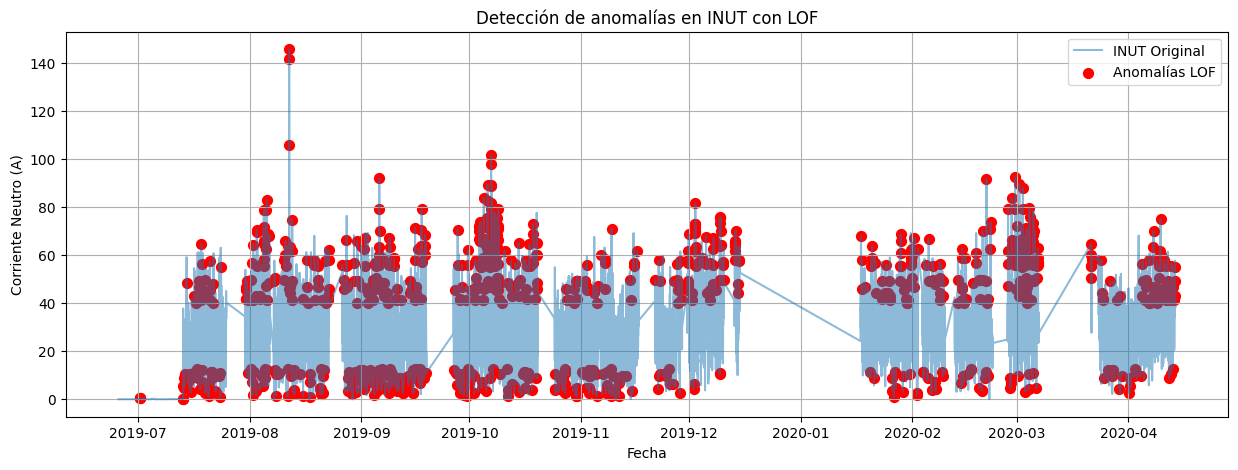

In [51]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(15, 5))

# Serie original de INUT (no estandarizada)
plt.plot(df['DeviceTimeStamp'], df['INUT'], label='INUT Original', alpha=0.5)

# Anomalías detectadas por LOF
plt.scatter(
    df.loc[df_preprocesado['anomaly_lof'], 'DeviceTimeStamp'],
    df.loc[df_preprocesado['anomaly_lof'], 'INUT'],
    color='red', label='Anomalías LOF', s=50
)

plt.title('Detección de anomalías en INUT con LOF')
plt.xlabel('Fecha')
plt.ylabel('Corriente Neutro (A)')
plt.legend()
plt.grid()
plt.show()

El algoritmo Local Outlier Factor (LOF) ha identificado anomalías tanto en los máximos de corriente de neutro como en registros intermedios que presentan baja densidad local respecto a sus vecinos. LOF demuestra ser un modelo más sensible frente a las fluctuaciones locales, permitiendo detectar tanto anomalías globales como micro-anomalías, ofreciendo un diagnóstico detallado del comportamiento del sistema eléctrico.

## Análisis

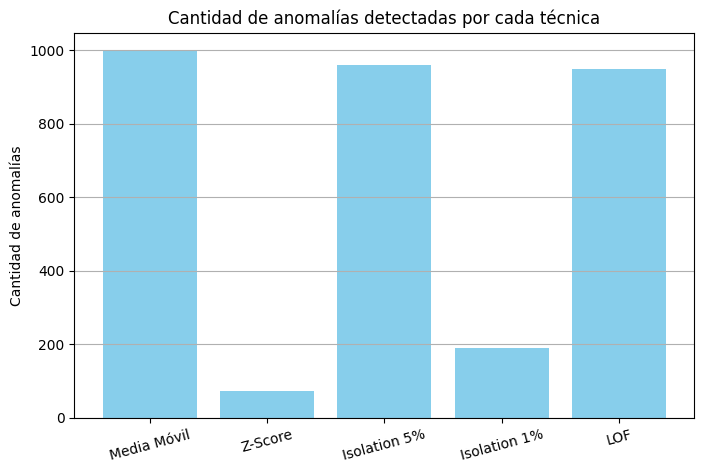

In [55]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones
# Preparar el resumen de cantidad de anomalías detectadas
total_ma = df['anomaly_moving_avg'].sum()
total_z = df_preprocesado['anomaly_zscore'].sum()
total_iso_5 = df_preprocesado['anomaly_isolation'].sum()
total_iso_1 = df_preprocesado['anomaly_isolation_1'].sum()
total_lof = df_preprocesado['anomaly_lof'].sum()

# Crear el resumen
summary = {
    'Media Móvil': total_ma,
    'Z-Score': total_z,
    'Isolation 5%': total_iso_5,
    'Isolation 1%': total_iso_1,
    'LOF': total_lof
}

# Graficar
plt.figure(figsize=(8,5))
plt.bar(summary.keys(), summary.values(), color='skyblue')
plt.title('Cantidad de anomalías detectadas por cada técnica')
plt.ylabel('Cantidad de anomalías')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


- Media Móvil e Isolation Forest al 5% son los métodos más sensibles, detectando un mayor número de registros anómalos
- Z-Score e Isolation Forest al 1% son significativamente más conservadores, detectando solo los casos de mayor severidad.
- LOF se posiciona como una técnica intermedia, capaz de capturar tanto picos extremos como micro-anomalías locales.

Cada técnica de detección de anomalías aplicada presenta fortalezas complementarias. Mientras que métodos como:
- Z-Score e Isolation Forest (1%) permiten identificar únicamente los picos de corriente más extremos.
- Métodos como Media Móvil, Isolation Forest (5%) y especialmente LOF ofrecen una detección más sensible, permitiendo capturar variaciones intermedias o micro-anomalías.
- La combinación de estos enfoques permite obtener un diagnóstico más completo del comportamiento anómalo de la corriente de neutro en el sistema eléctrico bajo análisis.

| Técnica               | ¿Captura picos extremos? | ¿Captura anomalías leves? | ¿Captura anomalías locales? | Sensibilidad         |
| --------------------- | ------------------------ | ------------------------- | --------------------------- | -------------------- |
| Media Móvil           | ✅ Sí                     | ✅ Sí                      | ❌ No                        | Alta (suaviza)       |
| Z-Score               | ✅ Sí                     | ❌ No                      | ❌ No                        | Baja (solo extremos) |
| Isolation Forest (5%) | ✅ Sí                     | ✅ Sí                      | ❌ Poco                      | Alta                 |
| Isolation Forest (1%) | ✅ Sí                     | ❌ No                      | ❌ No                        | Muy baja             |
| LOF                   | ✅ Sí                     | ✅ Sí                      | ✅ Sí                        | Muy alta             |


## Artículos de investigación

#### Artículo 1

In [53]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [54]:
# Coloca en este espacio el análisis del artículo 2